In [1]:
from qutip import *
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import cmath as cm

In [2]:
# plot style
plt.rcParams.update({'xtick.labelsize': 18})
plt.rcParams.update({'ytick.labelsize': 18})
plt.rcParams.update({'lines.linewidth': 2.0})
plt.rcParams.update({'axes.linewidth': 2.0})
plt.rcParams.update({'axes.labelpad': 10.0})
plt.rcParams.update({'axes.xmargin': 0.2})
plt.rcParams.update({'axes.ymargin': 0.2})
plt.rcParams.update({'xtick.major.size': 10.0})
plt.rcParams.update({'ytick.major.size': 10.0})
plt.rcParams.update({'xtick.major.width': 2.0})
plt.rcParams.update({'ytick.major.width': 2.0})
plt.rcParams.update({'xtick.major.pad': 10.0})
plt.rcParams.update({'ytick.major.pad': 10.0})
plt.rcParams.update({'xtick.direction': 'in'})
plt.rcParams.update({'ytick.direction': 'in'})
plt.rcParams.update({'font.family': 'serif'})
#plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'figure.dpi': 300})
plt.rcParams.update({'savefig.dpi': 300})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'legend.fontsize': 18.0})

$\textbf{Setting up:}$

In [3]:
g= basis(3, 0)
e = basis(3, 1)
f = basis(3, 2)

In [4]:
ω = 5.8*2*np.pi*10**3
γ_e = 6.7 
γ_f = 0.25
#J = 2 * np.pi * 3
#J = 2 * np.pi * 0.2

Δ = 0

# Parameters for predicted values
#α = np.sqrt(J * J - γ_e ** 2 / 16)
#θ = np.arcsin(γ_e / 4 / J)

z = complex(0,1)

In [5]:
# f state
psi0 = basis(3,2)

In [6]:
# A list of collapse operators
c_ops = []
L_e = np.sqrt(γ_e) * tensor(g,e.dag())
L_e.dims = [[3],[3]]
L_f = np.sqrt(γ_f) * tensor(e,f.dag())
L_f.dims = [[3],[3]]
c_ops.append(L_e)
c_ops.append(L_f)

In [7]:
tlist = np.linspace(0, 2, 100)

$\textbf{Fig. 2(a) and 2(b):} $

In [8]:
J_list = np.linspace(0, 20, 100)
J_list[:] = J_list[::-1]

In [9]:
tlist = np.linspace(0, 2, 100)

In [14]:
P_f_n_mat  = np.empty((1,100))

for i in range(100):
    
    H_eff = J_list[i]*(tensor(e,f.dag())+tensor(f,e.dag())) - (Δ/2)*(tensor(f,f.dag())-tensor(e,e.dag()))
    H_eff.dims = [[3],[3]]

    psi0 = basis(3,2)

    result = mesolve(H_eff, psi0, tlist, c_ops, []) 

    rho_ee = [state[1][0][1].real for state in result.states]
    rho_ff = [state[2][0][2].real for state in result.states]

    P_f_n_row = []
    #P_e_n = []

    for i in range(len(rho_ff)):
        P_f_n_row.append(rho_ff[i]/(rho_ee[i]+rho_ff[i]))
        #P_e_n.append(rho_ee[i]/(rho_ee[i]+rho_ff[i]))

    row_n = P_f_n_mat.shape[0]
    P_f_n_mat = np.insert(P_f_n_mat,row_n,[P_f_n_row],axis= 0)

In [15]:
P_f_n_mat = np.delete(P_f_n_mat, (0), axis=0)

<ipython-input-16-9222defba03e>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cmap = axes.pcolormesh(tlist, J_list, P_f_n_mat)


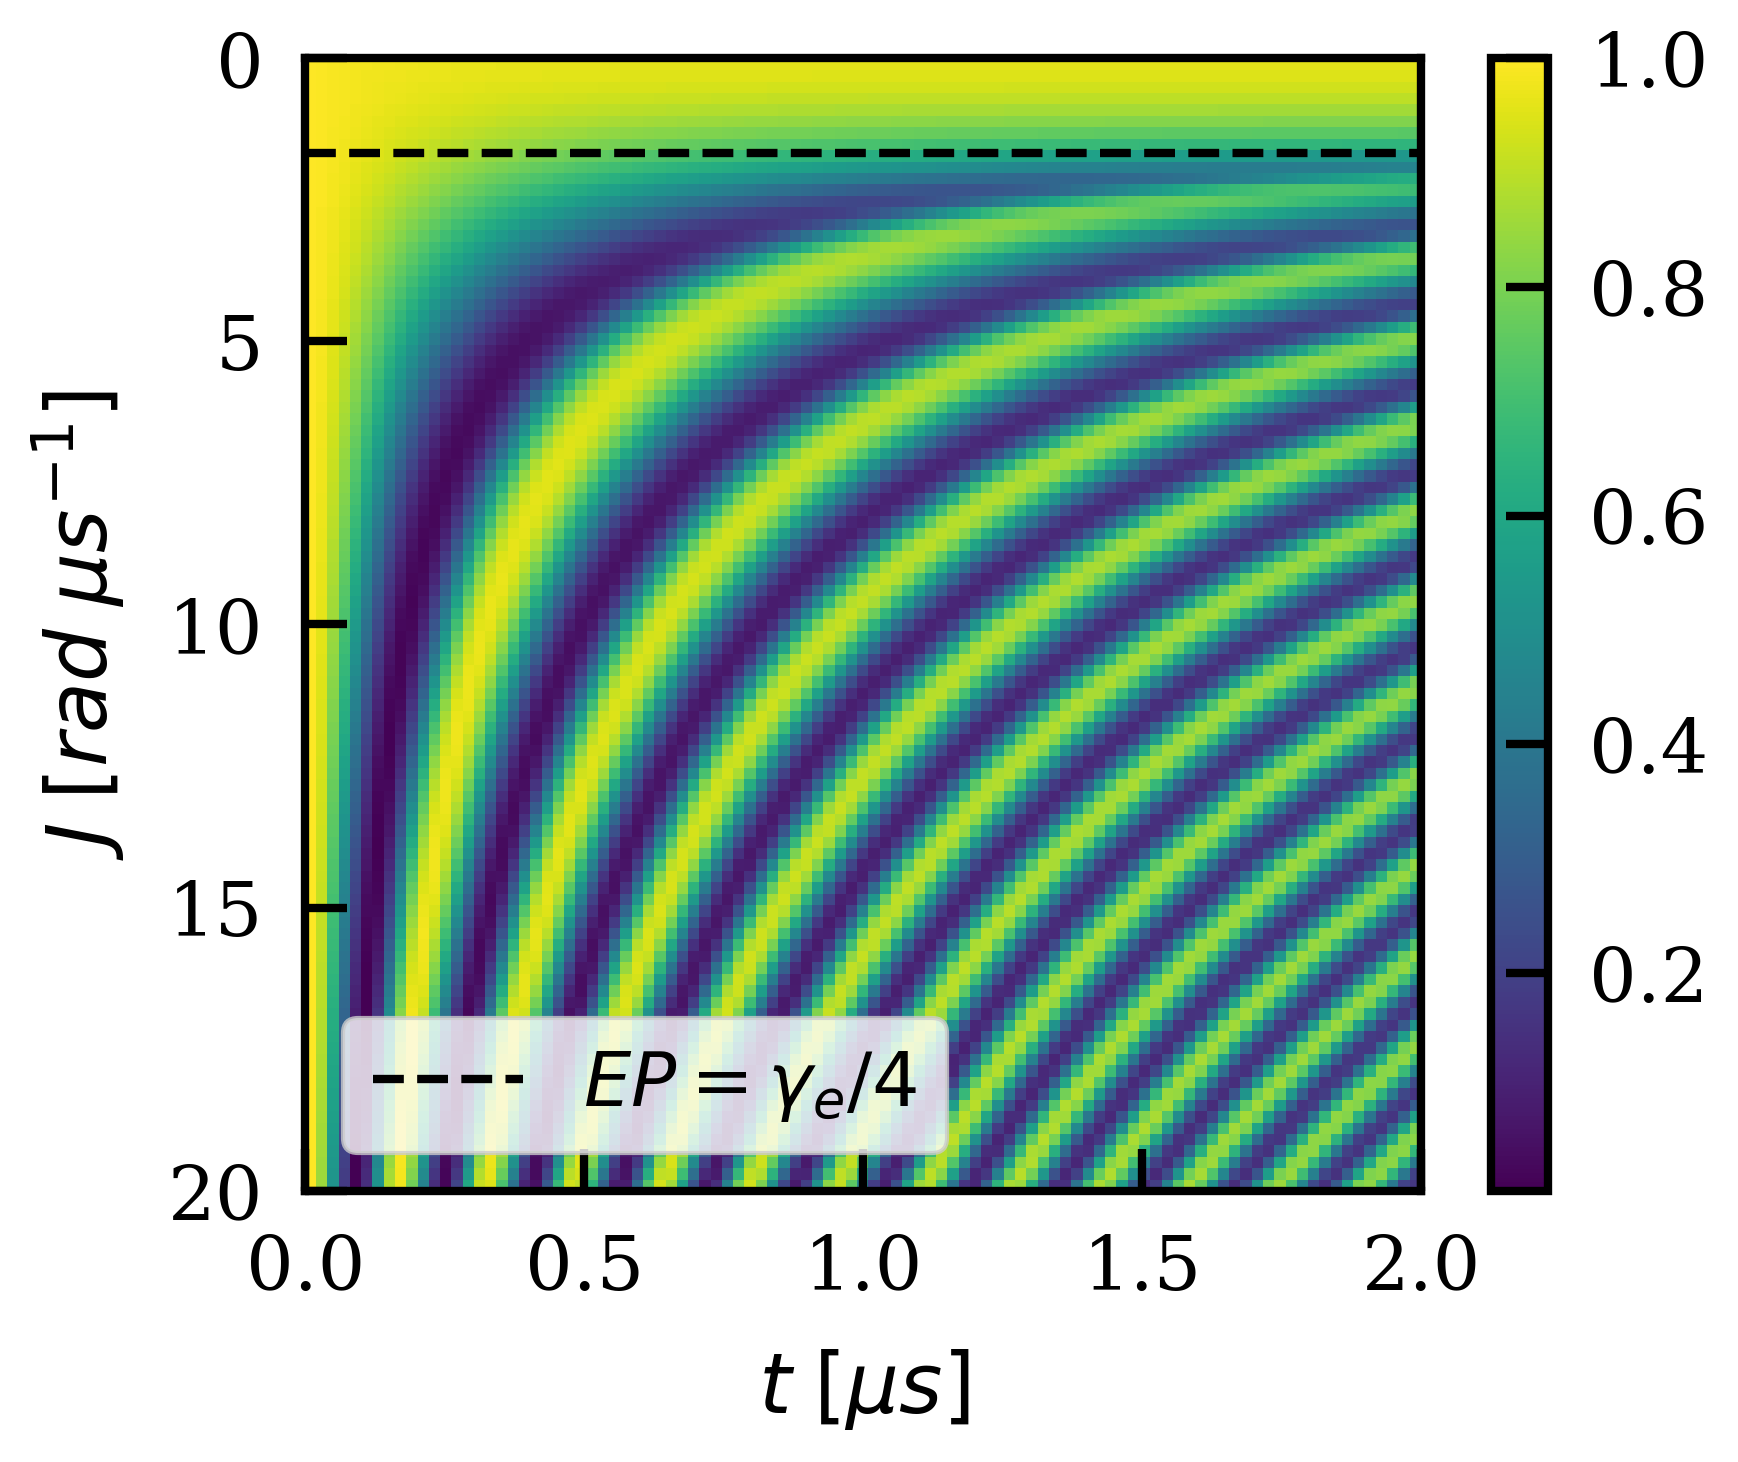

In [16]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(6, 5)

cmap = axes.pcolormesh(tlist, J_list, P_f_n_mat)
axes.axhline(xmin=0.0,xmax=20.0,y=γ_e/4,linestyle='--',color='black', label = r'$EP=\gamma_{e}/4$')

plt.gca().invert_yaxis()

fig.colorbar(cmap)

#axes.set_xlim([tlist[0], tlist[len(tlist)-1]])
#axes.set_ylim([0, 1.2])
axes.set_xlabel(r'$t\;[\mu s]$', fontsize=20)
axes.set_ylabel(r"$J\;[rad\;\mu s^{-1}]$", fontsize=20);
#axes.legend(loc='upper right')

axes.legend()
plt.show(fig)

<ipython-input-17-747e211235fa>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cmap = axes.pcolormesh(tlist, J_list, P_f_n_mat)


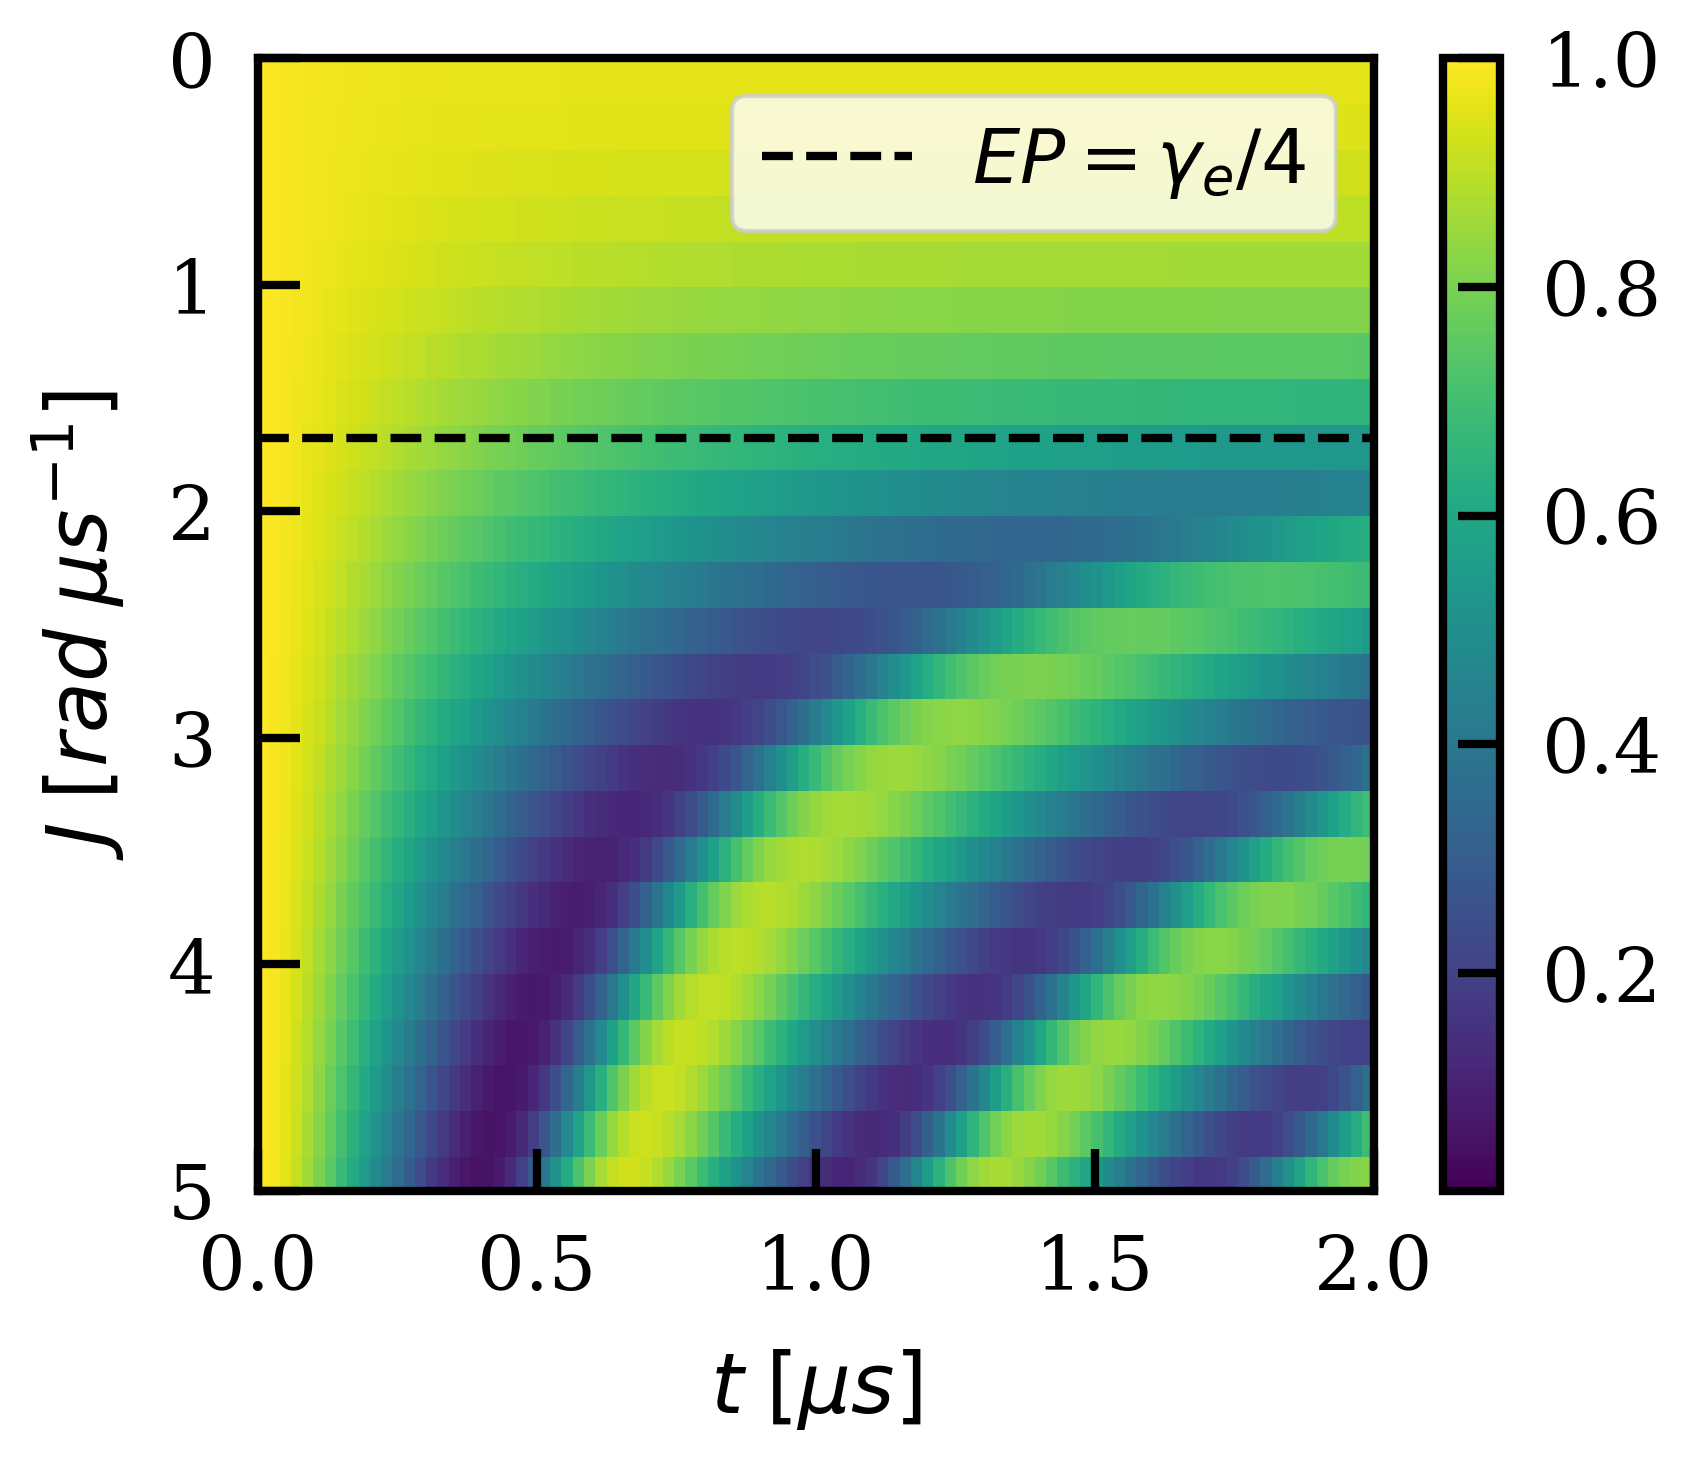

In [17]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(6, 5)

cmap = axes.pcolormesh(tlist, J_list, P_f_n_mat)


fig.colorbar(cmap)

#axes.set_xlim([tlist[0], tlist[len(tlist)-1]])
axes.set_ylim([0, 5])
plt.gca().invert_yaxis()
axes.set_xlabel(r'$t\;[\mu s]$', fontsize=20)
axes.set_ylabel(r"$J\;[rad\;\mu s^{-1}]$", fontsize=20);
axes.axhline(xmin=0.0,xmax=20.0,y=γ_e/4,linestyle='--',color='black', label = r'$EP=\gamma_{e}/4$')
#axes.legend(loc='upper right')

axes.legend()
plt.show(fig)

$\textbf{Fig.2(c):}$

In [18]:
def J_slice(J_var):
    
    H_eff = J_var*(tensor(e,f.dag())+tensor(f,e.dag())) - (Δ/2)*(tensor(f,f.dag())-tensor(e,e.dag()))
    H_eff.dims = [[3],[3]]

    result_J_var = mesolve(H_eff, psi0, tlist, c_ops, []) 
    
    rho_ff_var = [state[2][0][2].real for state in result_J_var.states]
    rho_ee_var = [state[1][0][1].real for state in result_J_var.states]

    P_f_n_var = []

    for i in range(len(rho_ff_var)):

        P_f_n_var.append(rho_ff_var[i]/(rho_ee_var[i]+rho_ff_var[i]))
        
    return P_f_n_var

In [19]:
P_f_n_1 = J_slice(1)
P_f_n_3 = J_slice(3)

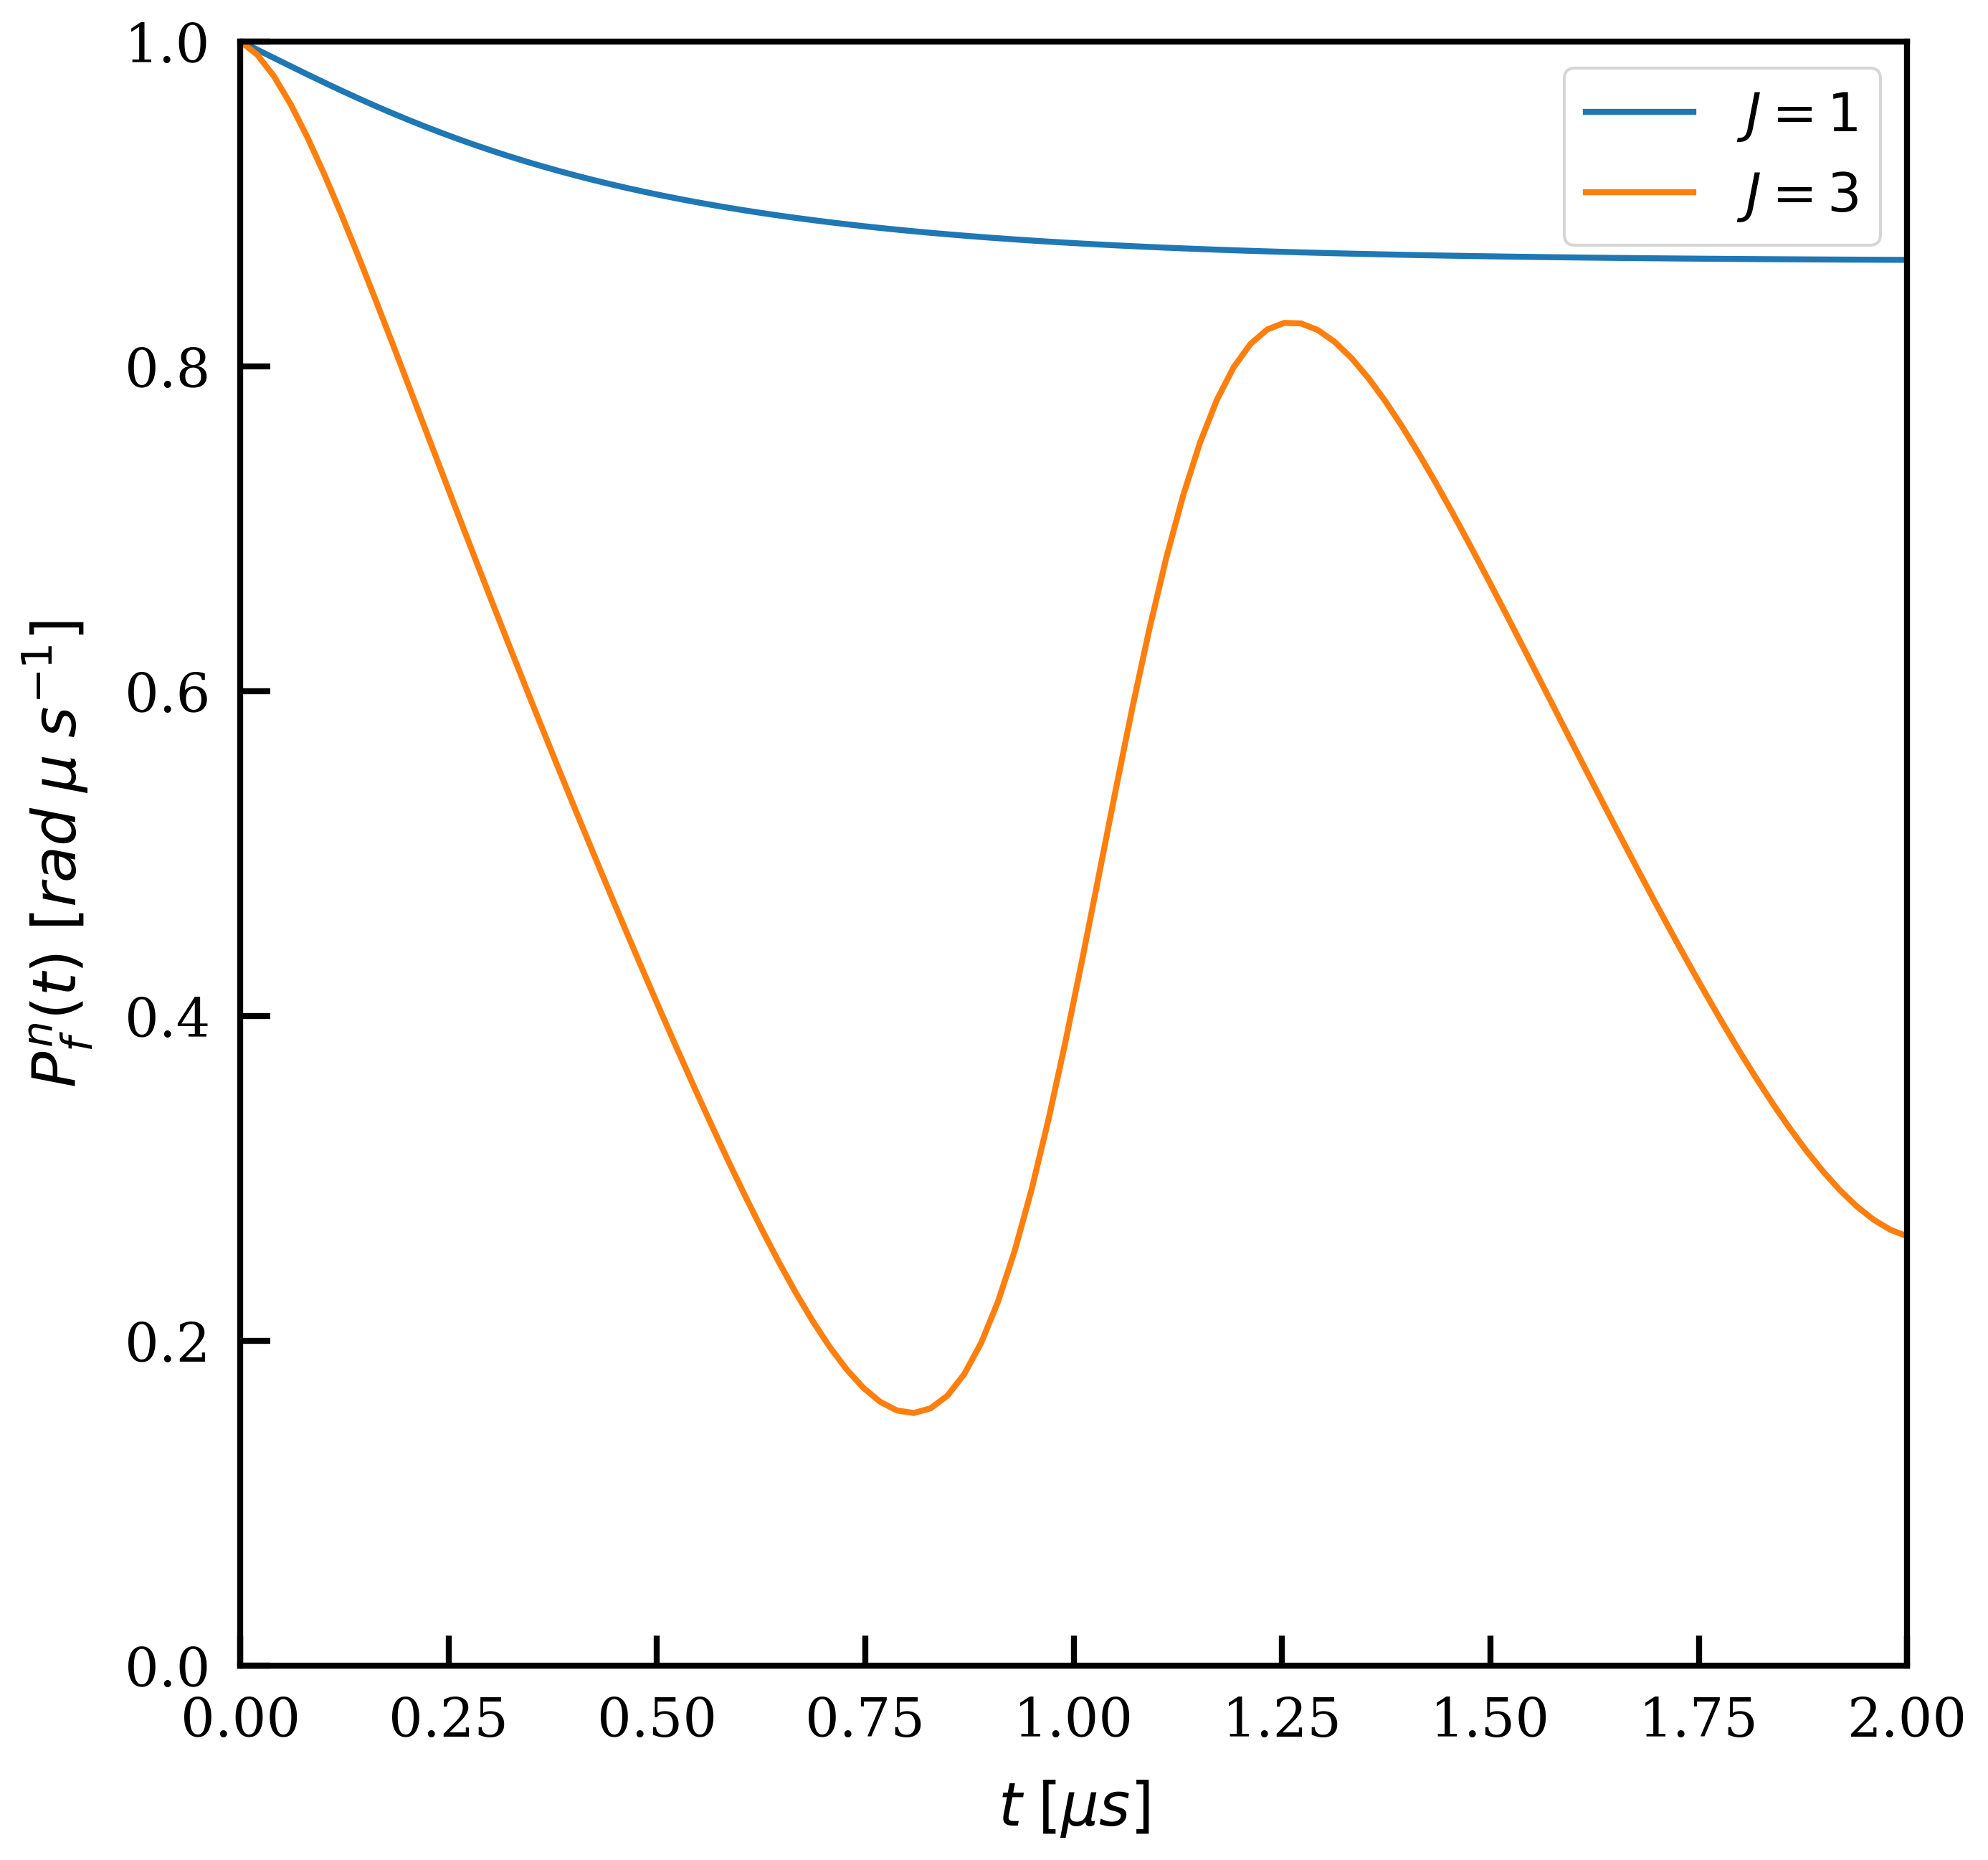

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(10, 10)

axes.plot(tlist, P_f_n_1, label = r'$J=1$')
axes.plot(tlist, P_f_n_3, label = r'$J=3$')

axes.set_xlim([tlist[0], tlist[len(tlist)-1]])
axes.set_ylim([0, 1])
axes.set_xlabel(r'$t\;[\mu s]$', fontsize=20)
axes.set_ylabel(r'$P_{f}^{n}(t)$ $[rad\;\mu\;s^{-1}]$', fontsize=20);
axes.legend()

$\textbf{Fig.2(d):}$

In [29]:
from scipy.optimize import curve_fit

In [39]:
def Re_delta_lambda(J_var):
    return (cm.sqrt(4*J_var**2 - γ_e**2/4)).real

In [61]:
J_list = np.linspace(0, 5, 100)

In [45]:
Omega_R = []

for entry in J_list:
    Omega_R.append(Re_delta_lambda(entry))

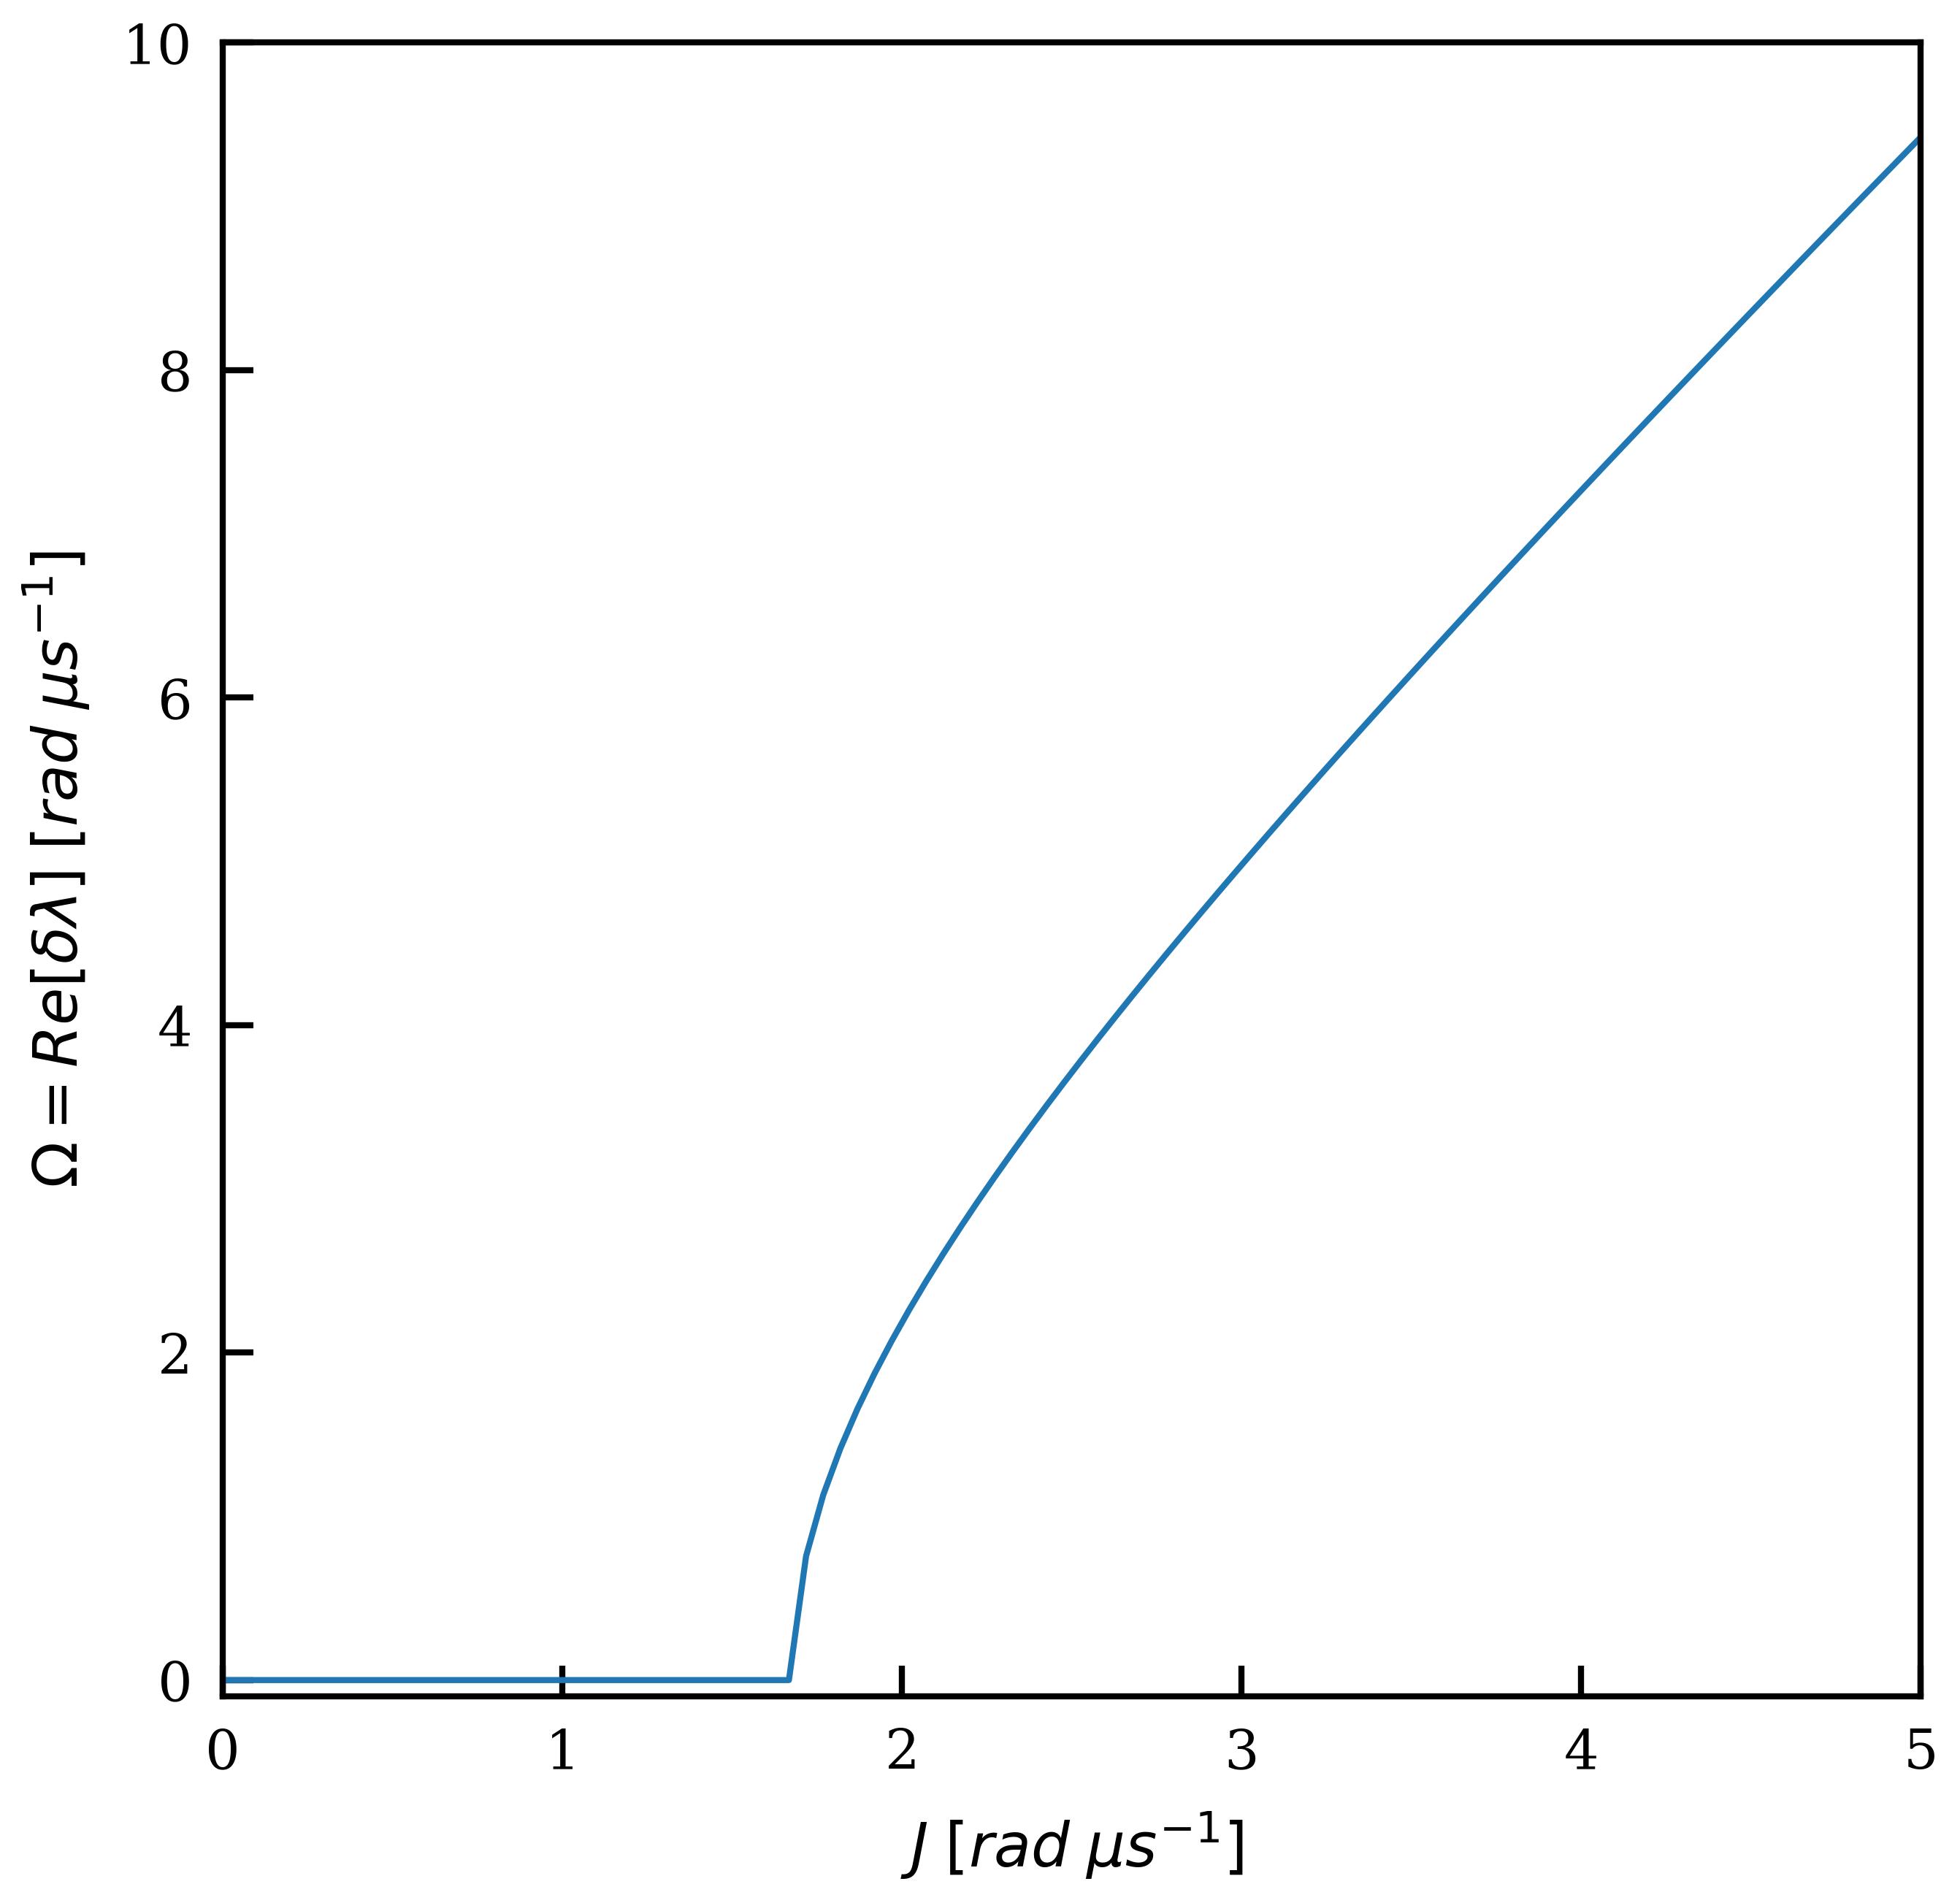

In [76]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(10, 10)

axes.plot(J_list, Omega_R)

axes.set_xlim(0, 5)
axes.set_ylim([-0.1, 10])
axes.set_xlabel(r'$J\;[rad\;\mu s^{-1}]$', fontsize=20)
axes.set_ylabel(r'$\Omega = Re[\delta\lambda]\;[rad\;\mu s^{-1}]$', fontsize=20);
#axes.legend()

$\textbf{Fig.2(e):}$

In [21]:
sx = tensor(e,f.dag()) + tensor(f,e.dag())
sx.dims = [[3],[3]]

sy = -z*tensor(e,f.dag()) + z*tensor(f,e.dag())
sy.dims = [[3],[3]]

sz = tensor(e,e.dag()) - tensor(f,f.dag())
sz.dims = [[3],[3]]

In [22]:
def Bloch_coordinates(J_var, time):
    
    time_list = np.linspace(0, time, 100)
    
    H_eff = J_var*(tensor(e,f.dag())+tensor(f,e.dag())) - (Δ/2)*(tensor(f,f.dag())-tensor(e,e.dag()))
    H_eff.dims = [[3],[3]]

    result_J_var = mesolve(H_eff, psi0, time_list, c_ops, [sx, sy, sz]) 
    return result_J_var.expect[0], result_J_var.expect[1], result_J_var.expect[2]

In [23]:
sx_s, sy_s, sz_s = Bloch_coordinates(γ_e, 2)
sx_b, sy_b, sz_b = Bloch_coordinates(γ_e*0.2, 0.4)

In [24]:
b = Bloch()
#b.view = [0,0]
b.zlabel = [r'$|e\rangle$', r'$|f\rangle$']

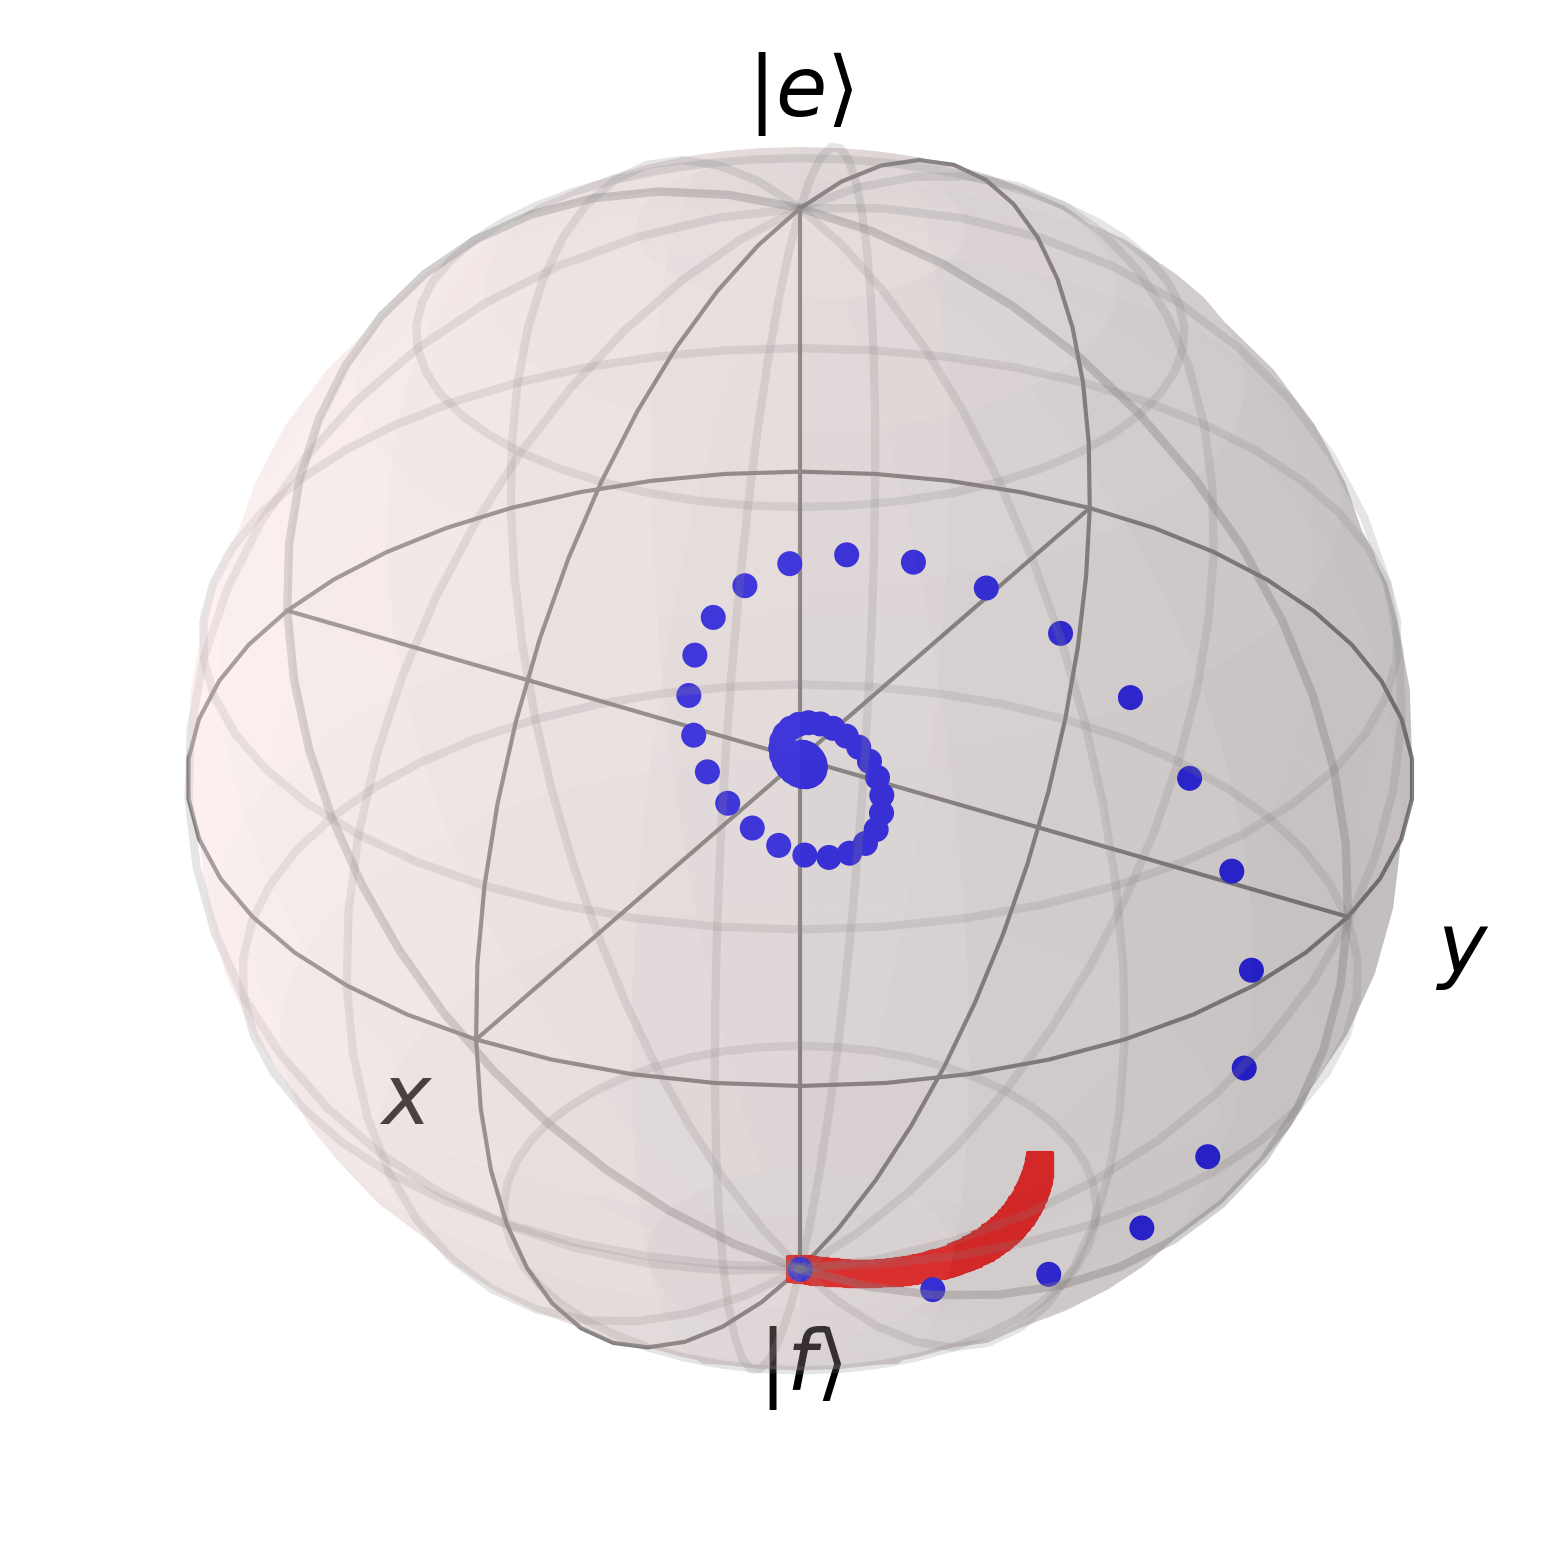

In [25]:
b.clear()
b.add_points([sx_s, sy_s, sz_s])
b.add_points([sx_b, sy_b, sz_b])
b.show()